In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import sklearn

**Explore data distribution and remove outliers**

In [3]:
# -- Read matrix containing embeddings and labels
path_X = '/Users/leandrojorqueravalero/Desktop/PhD/synthetic_ORF2/data/X.csv' 
X = pd.read_csv(path_X)

In [4]:
# Remove undesired column and filter mammalian entries
X = X.drop(columns=['Unnamed: 0'])
X_mammals = X[X['Taxonomy'] == 'Mammalia']

**Check how CN and prot_len distribution changes when removing non-mammals**

In [ ]:
X['Non_redundant'].hist(bins = 20, figsize=(12,8))

In [ ]:
X_mammals['Non_redundant'].hist(bins = 20, figsize=(12,8))

In [ ]:
X['prot_len'].hist(bins = 20, figsize=(12,8))

In [ ]:
X_mammals['prot_len'].hist(bins = 20, figsize=(12,8))

**Explore correlation among all dimensions and between each vector dimension and CN values(Watch out columns numbers)**

In [5]:
# -- Compute correlation matrix among dimensiones (contains Pearson's r)
corr_matrix = X_mammals.corr() # generate correlation matrix
correlations = corr_matrix['Non_redundant'].sort_values(ascending=False) # check columns (dimensions) that correlates more to CN

In [72]:
# -- Different to plot correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8
0,1.000000,0.813926,0.365214,-0.622472,0.805360,-0.340347,-0.423088,-0.875190,0.176651
1,0.813926,1.000000,-0.198694,-0.490920,0.768602,-0.191081,-0.704305,-0.717802,0.599106
2,0.365214,-0.198694,1.000000,-0.414234,0.179475,-0.415282,0.410696,-0.393059,-0.760103
3,-0.622472,-0.490920,-0.414234,1.000000,-0.585723,0.843724,0.419716,0.795518,-0.040017
4,0.805360,0.768602,0.179475,-0.585723,1.000000,-0.433848,-0.658321,-0.914056,0.300612
5,-0.340347,-0.191081,-0.415282,0.843724,-0.433848,1.000000,0.183041,0.649430,-0.048284
6,-0.423088,-0.704305,0.410696,0.419716,-0.658321,0.183041,1.000000,0.469575,-0.579899
7,-0.875190,-0.717802,-0.393059,0.795518,-0.914056,0.649430,0.469575,1.000000,-0.206255
8,0.176651,0.599106,-0.760103,-0.040017,0.300612,-0.048284,-0.579899,-0.206255,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

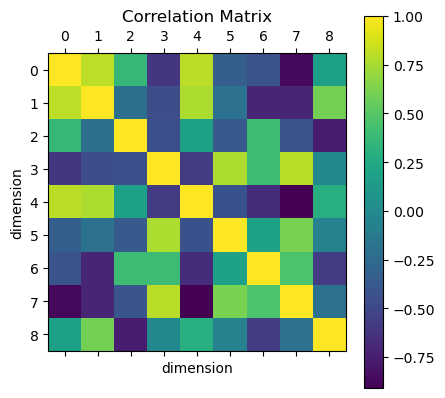

In [36]:
plt.matshow(corr)
cb = plt.colorbar()
plt.xlabel('dimension')
plt.ylabel('dimension')
plt.title('Correlation Matrix', fontsize=12)

In [73]:
# -- This explores pairwise correlation (what kind?) among ALL DIMENSIONS (not only against CN)
split_df = X_mammals.iloc[:9,:10]   # generate a subset from the original dataset
corr = df.corr()   # Compute correlaion (based on Pearson)

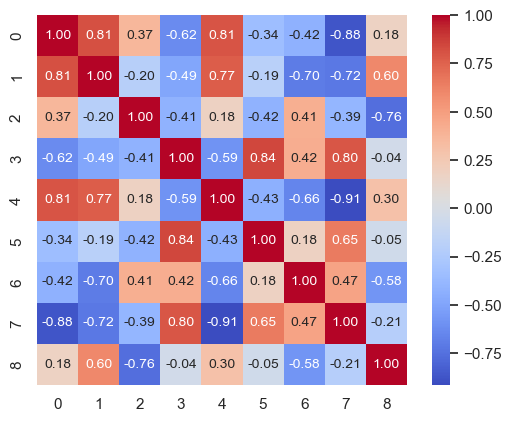

In [74]:
# -- Exploring another correlation coefficient matrix with Numpy
numbers = split_df.iloc[:,1:]  # select only numerical values 
cm = np.corrcoef(numbers.values.T)  # Compute correlation coefficient
sns.set(font_scale=1) # letter size
hm = sns.heatmap(cm, cmap='coolwarm', cbar=True, annot=True, square=True, fmt = '.2f', annot_kws={'size': 10},) # yticklabels=cols, xticklabels=cols

In [79]:
# -- Select dimensions with highest correlations to CN
X_mammals_numbers = X_mammals.iloc[:,1:-2]  # leave only embs dimensions and copy number values
corr_matrix = X_mammals_numbers.corr() # compute correlation matrix
correlations = corr_matrix['Non_redundant'].sort_values(ascending=False) # check columns (dimensions) that correlates more to CN
#most_correlated = correlations.nlargest(30)

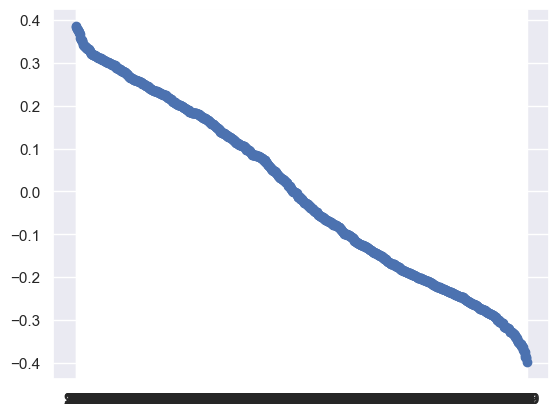

In [107]:
clean_correlations = correlations.iloc[1:]  # remove first row that match CN againts itself (coefficient = 1)
plt.scatter(y=clean_correlations.values, x=clean_correlations.index)

In [111]:
# contains dimensions that correlate most (watch out columns numbers to dont mess up)
most_correlated = clean_correlations.nlargest(50)

In [113]:
key_dimensions = list(most_correlated.index)

In [10]:
from sklearn import feature_selection

In [11]:
corre_test = X_mammals.iloc[:10]  # select only 10 first rows for test
dimensions = corre_test.iloc[:,1:1025] # select vector dimensions
CN = corre_test['Non_redundant'] # select cn column

In [12]:
# -- Compute Peason's r for each features and the TARGET
pearson = sklearn.feature_selection.r_regression(dimensions, CN, force_finite=True)

**Applying PCA over all PC**

In [ ]:
scale = StandardScaler()
pca = PCA() # Define PCA function

my_pca = pca.fit_transform(matched_emb)   # Scale data and apply PCA on embeddings df
dataframe_pca = pd.DataFrame(my_pca)

**Performing linear regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)  # split dataset